# Support Vector Regression (SVR)

## Importing the libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [7]:
dataset = pd.read_csv('DatasetMonthly3.csv')
train = dataset.iloc[0:123,:] 
test = dataset.iloc[123:-1,:] 

X_train = np.array(train.iloc[:, 0]).reshape(-1, 1)
y_train = np.array(train.iloc[:, 1]).reshape(-1, 1)
X_test = np.array(test.iloc[:, 0]).reshape(-1, 1)
y_test = np.array(test.iloc[:, 1]).reshape(-1, 1)

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)




## Training the SVR model on the Training set

In [9]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting the Test set results

In [10]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[39408760.12 39591854.  ]
 [39447288.77 39100499.  ]
 [39478920.53 37726472.88]
 [39501298.83 37866809.  ]
 [39515626.06 38550694.  ]
 [39520763.4  38894976.  ]
 [39516794.83 40100440.59]
 [39503310.78 40950726.39]
 [39481093.63 39838307.03]
 [39448625.99 40738291.74]
 [39406513.41 40699842.98]
 [39360251.45 39735951.44]
 [39300052.01 39573744.46]
 [39232983.81 38179073.88]
 [39154815.79 37240557.1 ]
 [39070870.69 36792495.92]
 [38975893.64 37836828.47]
 [38872942.17 37818309.05]
 [38766135.63 39252000.52]
 [38648822.88 39201262.49]
 [38529054.39 38645417.47]
 [38399378.53 38376549.11]
 [38264257.58 38693924.07]
 [38133450.16 39427420.71]
 [37989489.98 40248709.4 ]
 [37846678.52 38626336.87]
 [37696101.65 37527874.44]
 [37548054.7  37232054.08]
 [37393269.88 37668458.76]
 [37237255.02 38319671.43]
 [37085662.54 38175488.11]
 [36928948.34 38728525.32]
 [36777741.18 38754623.81]
 [36622477.86 39342315.85]
 [36468713.02 38813276.99]
 [36331510.99 40518867.04]
 [36181878.62 39408438.43]
 

## Evaluating the Model Performance

In [13]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
print(r2_score(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

-8.295968435455498
3415769.818238113


## Visualising the Support Vector Regression results (for higher resolution and smoother curve)

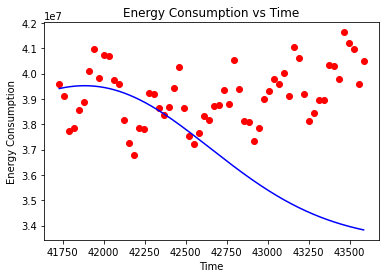

In [12]:
X_grid = np.arange(min(X_test), max(X_test), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Energy Consumption vs Time')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.show()